In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [5]:
import numpy as np
import networkx as nx

def klemm_eguiluz_graph(N, M, mu=0.01, random_seed=42):
    """
    Ref.: https://arxiv.org/pdf/cond-mat/0107607.pdf
    
    This model follows these steps for growing a graph:
    Taking a completely connected network of m active nodes as an initial condition,
    (i) A new node joins the network by attaching a link to each of the m active nodes.
        With probability mu, a random node is chosen according to linear preferential attachment.
    (ii) The new node becomes active.
    (iii) One of the active nodes is deactivated with prob dependent on their degree (see ref).
    """
    np.random.seed(random_seed)
    G = nx.Graph()
    for n in range(N):
        G.add_node(n)
    degrees = np.zeros(N)
    def add_edge(i, j):
        G.add_edge(i, j)
        degrees[i] += 1
        degrees[j] += 1
    active_nodes = []
    # Taking a completely connected network of m active nodes as an initial condition
    for i in range(M):
        active_nodes.append(i)
        for j in range(i+1, M):
            add_edge(i, j)
    for i in list(range(M, N)) + list(range(0, M)):
        # (i) A new node joins the network by attaching a link to each of the m active nodes.
        for n in active_nodes:
            if np.random.rand() > mu:
                add_edge(i, n)
            else:
                # With probability mu, a random node is chosen according to linear preferential attachment
                j = i
                while j == i or j in active_nodes:
                    attachment_prob = (degrees+1e-4)/(degrees+1e-4).sum() #degrees/degrees.sum()
                    j = np.random.multinomial(1, attachment_prob).argmax()
                add_edge(i, j)
        # (ii) The new node becomes active.
        active_nodes.append(i)
        # (iii) One of the active nodes is deactivated with prob dependent on their degree.
        act_degrees = degrees[active_nodes]
        pkj = 1 / act_degrees
        probs = pkj/pkj.sum()
        j = np.random.multinomial(1, probs).argmax()
        active_nodes.pop(j)
        
    return G

In [6]:
import networkx as nx

Growing Watts-Strogatz graph

In [3]:
N = 100
M = 5
mu = 0.1

np.random.seed(42)

G = nx.Graph()

for n in range(N):
    G.add_node(n)

active_nodes = set()

for i in range(M):
    active_nodes.add(i)
    for j in range(M):
        active_nodes.add(j)
        if i!=j:
            G.add_edge(i, j)
            
for i in list(range(M, N)) + list(range(0, M)):
    for n in active_nodes:
        if np.random.rand() > mu:
            G.add_edge(i, n)
        else:
            j = i
            while j == i or j in active_nodes:
                j = np.random.choice(N)
            G.add_edge(i, j)
    
    j = np.random.choice(list(active_nodes))
    active_nodes.remove(j)
    active_nodes.add(i)

In [7]:
G = klemm_eguiluz_graph(200, 2, 0.01)

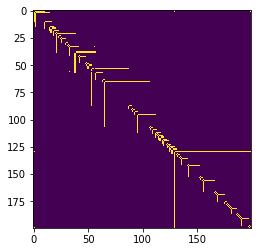

In [8]:
A = nx.to_numpy_matrix(G)
plt.imshow(A)

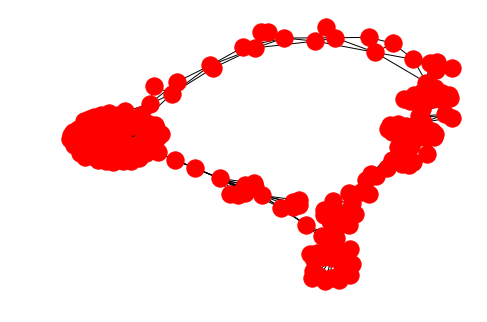

In [9]:
nx.draw_spring(G)

In [10]:
nx.average_clustering(G)

0.793371310218986

In [11]:
nx.average_clustering(nx.erdos_renyi_graph(N, 0.1))

0.10608491018785131

In [12]:
nx.average_clustering(nx.barabasi_albert_graph(N, M))

0.1779068181162002

In [9]:
Gws = nx.watts_strogatz_graph(N, M*2, 0.1)
print(nx.average_clustering(Gws))
print(Gws.number_of_edges())

0.47591702741702735
500


Growing Watts-Strogatz graph with preferential attachment (Klemm and Eguíluz)

In [10]:
N = 2000
M = 2
mu = 0.1

np.random.seed(42)

G = nx.Graph()

for n in range(N):
    G.add_node(n)

active_nodes = set()

for i in range(M):
    active_nodes.add(i)
    for j in range(M):
        active_nodes.add(j)
        if i!=j:
            G.add_edge(i, j)
            
for i in list(range(M, N)) + list(range(0, M)):
    for n in active_nodes:
        if np.random.rand() > mu:
            G.add_edge(i, n)
        else:
            j = i
            while j == i or j in active_nodes
                degrees = G.degree()
                degree_seq = np.array([d[1] for d in degrees])
                attachment_prob = degree_seq/degree_seq.sum()
                j = np.random.multinomial(1, attachment_prob).argmax()
            G.add_edge(i, j)
    
    j = np.random.choice(list(active_nodes))
    active_nodes.remove(j)
    active_nodes.add(i)

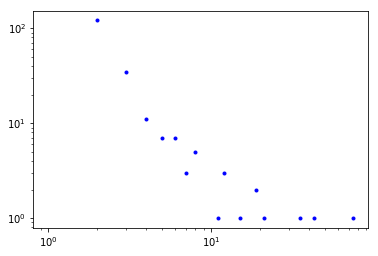

In [30]:
plot(nx.degree_histogram(G), 'b.')a
plt.loglog();

In [12]:
nx.average_clustering(G)

0.3982840659340642

In [13]:
nx.average_clustering(nx.erdos_renyi_graph(N, 0.1))

0.09994581188649078

In [14]:
nx.average_clustering(nx.barabasi_albert_graph(N, M))

0.011020920813916067

In [15]:
Gws = nx.watts_strogatz_graph(N, M*2, 0.1)
print(nx.average_clustering(Gws))
print(Gws.number_of_edges())

0.3616666666666674
4000


In [16]:
print(nx.average_clustering(G))
print(G.number_of_edges())

0.3982840659340642
4000


In [16]:
from collections import *

([array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([2., 0., 0., 0., 0., 0.

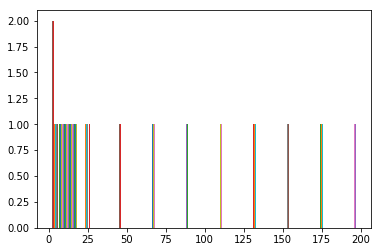

In [22]:
plt.hist(G.degree())

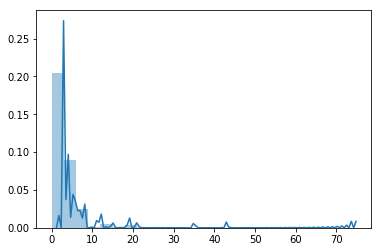

In [28]:
import seaborn as sns

sns.distplot(list(dict(G.degree()).values()), bins=np.arange(0, 30, 3))


In [29]:
help(sns.distplot)

Help on function distplot in module seaborn.distributions:

distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)
    Flexibly plot a univariate distribution of observations.
    
    This function combines the matplotlib ``hist`` function (with automatic
    calculation of a good default bin size) with the seaborn :func:`kdeplot`
    and :func:`rugplot` functions. It can also fit ``scipy.stats``
    distributions and plot the estimated PDF over the data.
    
    Parameters
    ----------
    
    a : Series, 1d-array, or list.
        Observed data. If this is a Series object with a ``name`` attribute,
        the name will be used to label the data axis.
    bins : argument for matplotlib hist(), or None, optional
        Specification of hist bins, or None to use Freedman-Diaconis rule.
    hist : bool, optional
        Whether to plot 